<a target="_blank" href="https://colab.research.google.com/github/evaalonsoortiz/ELE8812-demos/blob/main/Demos/Lesson%204/Le%C3%A7on_4_Demo_ph.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# ELE8812 - Traitement fréquentiel

## Démo : Filtrage passe-haut, filtres classiques

### Référence : DIP 4e édition, Chapitre 4, Section 4.9

Dans ce démo, une image sera filtrée dans le domaine fréquentiel en utilisant 3 différents types de filtres : filtre idéal passe-haut, gaussien passe-haut et Butterworth passe-haut. Pour ce faire, la transformée de Fourier (TF) de l’image sera d’abord effectuée. Le spectre de fréquences de l’image sera multiplié élément-par-élément par la réponse fréquentielle des filtres. Une TF inverse sera ensuite appliquée avant de pouvoir visualiser l’image filtrée. Trois paramètres de filtrage pourront être modifiés. La réponse fréquentielle d’un filtre passe-haut correspond à 1 – la réponse fréquentielle de la version passe-bas du filtre.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
!git clone https://github.com/evaalonsoortiz/ELE8812-demos.git Repo

Mounted at /content/drive


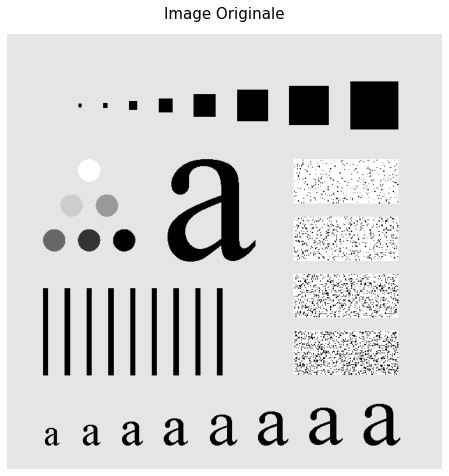

In [3]:
# Charger image
A = plt.imread('Repo/Data/Lettres.tif');
plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.axis('off'); plt.show();

In [4]:
def filtpb_butter(A, fc, ordre, pad):
    """ Application d'un filtre Butterworth sur une image im à une fréquence de coupure fc dans 
        le domaine fréquentiel
    
    A (ndarray): Image d'entrée
    fc (float): Fréquence de coupure
    ordre (int): Ordre du filtre
    pad (int): Nombre de pixels de padding
    """
    M,N = A.shape
    M+=pad
    N+=pad

    # Image dans le domaine fréquentiel
    AA = np.fft.fftshift(np.fft.fft2(A, (M,N)))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2

    # Réponse fréquentielle du filtre Butterworth
    HH = 1 / (1 + (D2 / fc**2)**ordre)
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B[:A.shape[0],:A.shape[1]] 

In [5]:
def filtpb_gauss(A, fc, pad):
    """ Application d'un filtre gaussien sur une image im à une fréquence de coupure fc dans 
        le domaine fréquentiel
    
    A (ndarray): Image d'entrée
    fc (float): Fréquence de coupure
    pad (int): Nombre de pixels de padding
    """
    M,N = A.shape
    M+=pad
    N+=pad

    # Image dans le domaine fréquentiel
    AA = np.fft.fftshift(np.fft.fft2(A, (M,N)))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2
    
    # Réponse fréquentielle du filtre gaussien
    HH = np.exp(-D2 / (2 * fc**2))
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B[:A.shape[0],:A.shape[1]]       

In [6]:
def filtpb_idéal(A, fc, pad):
    """ Application d'un filtre gaussien sur une image im à une fréquence de coupure fc dans 
        le domaine fréquentiel
    
    A (ndarray): Image d'entrée
    fc (float): Fréquence de coupure
    pad (int): Nombre de pixels de padding
    """
    M,N = A.shape
    M+=pad
    N+=pad

    # Image dans le domaine fréquentiel
    AA = np.fft.fftshift(np.fft.fft2(A, (M,N)))

    M0 = np.ceil((M+1) / 2)
    N0 = np.ceil((N+1) / 2)

    U, V = np.mgrid[1:M+1, 1:N+1]
    D2 = (U - M0)**2 + (V - N0)**2
    
    # Réponse fréquentielle du filtre idéal
    HH = (D2<= fc**2)
    
    # Application du filtre et retour au domaine spatial
    BB = np.fft.ifftshift(AA * HH)
    B = np.fft.ifft2(BB)
    B = np.real(B)
    return B[:A.shape[0],:A.shape[1]]     

## Fréquence de coupure

Pour les 3 types de filtres passe-haut, plus la fréquence de coupure augmente, plus le contenu autre que les transitions d'intensité abruptes est effacé.

In [8]:
slider_fc = widgets.IntSlider(min=1, max=100, step=1, description='fc:', readout=True,)
display(slider_fc)

IntSlider(value=1, description='fc:', min=1)

## Taille du prolongement de l'image

Cette variable contrôle le nombre de zéros ajoutés en périphérie de l’image avant d’effectuer la TF. L’équivalent dans le domaine spatial d’une multiplication dans le domaine fréquentiel est une convolution circulaire (hypothèse implicite de périodicité). On peut imaginer que l’image se répète à l’infini dans chaque direction. L’ajout de zéros avant le filtrage permet d’éviter que le résultat du filtrage aux bords de l’image soit affecté par les pixels du bord opposé. Cet effet de *wrapping* n’est pas visible avec l’image utilisée puisque les bords de l’image sont tous pareils (voir le démo Leçon_4_Demo_pb.ipynb pour un exemple). Le prolongement par des zéros introduit une bordure de faible intensité aux bords de l’image (plus visible avec une fréquence de coupure faible).

In [9]:
slider_pad = widgets.IntSlider(min=0, max=10, step=1, description='pad:', readout=True,)
display(slider_pad)

IntSlider(value=0, description='pad:', max=10)

## Ordre du filtre

Cette variable influence uniquement le filtre Butterworth. Lorsque l’ordre du filtre augmente, l’allure du filtre se rapproche d’un filtre idéal. La précision de coupure est meilleure mais on voit apparaitre des artéfacts d’oscillations (comme pour le filtre idéal).

In [10]:
slider_order = widgets.IntSlider(min=1, max=8, step=1, description='n:', readout=True,)
display(slider_order)

IntSlider(value=1, description='n:', max=8, min=1)

## Résultats

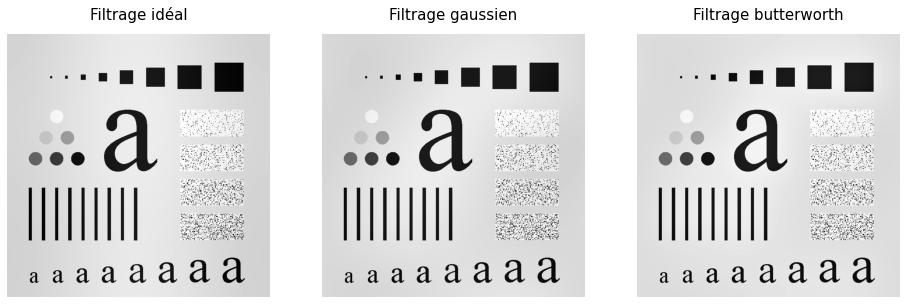

In [11]:
plt.subplot(131); plt.imshow(A-filtpb_idéal(A,slider_fc.value,slider_pad.value), cmap='gray'); plt.title('Filtrage idéal'); plt.axis('off');
plt.subplot(132); plt.imshow(A-filtpb_gauss(A,slider_fc.value,slider_pad.value), cmap='gray'); plt.title('Filtrage gaussien'); plt.axis('off');
plt.subplot(133); plt.imshow(A-filtpb_butter(A, slider_fc.value, slider_order.value, slider_pad.value), cmap='gray'); plt.title('Filtrage butterworth'); plt.axis('off');
plt.show()

**Filtre idéal :** Le filtre passe-haut idéal entraîne des artéfacts d’oscillation et ce, même à une fréquence de coupure peu élevée. Rappel : une multiplication dans le domaine fréquentiel correspond à une convolution dans le domaine spatial, la représentation spatiale d’un filtre idéal contient des oscillations (fonction [jinc](https://fr.wikipedia.org/wiki/Fonction_sombrero)).

**Filtre gaussien :** Le filtre gaussien n’entraîne pas d’artéfacts d’oscillation : sa représentation spatiale décroît de façon monotonique.

**Filtre Butterworth :** Comme mentionné plus haut, plus l’ordre d’un filtre Butterworth est élevé, plus sa représentation se rapproche d’un filtre idéal et plus il y a présence d’artéfacts d’oscillation dans l’image filtrée.
